In [ ]:
!pip install lavague

In [2]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

In [6]:
from lavague.core.evaluator import RetrieverEvaluator

retriever_evaluator = RetrieverEvaluator()

In [8]:
import pandas as pd
import os

!wget https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/TheWaveMetaSmall.csv

raw_dataset = pd.read_csv("TheWaveMetaSmall.csv")

rephrased = retriever_evaluator.rephrase_dataset(raw_dataset, "TheWaveSmallRephrased.csv")

--2024-06-17 08:32:19--  https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/TheWaveMetaSmall.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4194765 (4.0M) [text/plain]
Saving to: ‘TheWaveMetaSmall.csv’

TheWaveMetaSmall.cs 100%[===================>]   4.00M  --.-KB/s    in 0.08s   

2024-06-17 08:32:20 (52.1 MB/s) - ‘TheWaveMetaSmall.csv’ saved [4194765/4194765]



5it [00:04,  1.16it/s]


In [9]:

!wget https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/TheWaveMetaSmall.csv

raw_dataset = pd.read_csv("TheWaveMetaSmall.csv")

--2024-06-17 08:32:25--  https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/TheWaveMetaSmall.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4194765 (4.0M) [text/plain]
Saving to: ‘TheWaveMetaSmall.csv.1’

TheWaveMetaSmall.cs 100%[===================>]   4.00M  --.-KB/s    in 0.05s   

2024-06-17 08:32:25 (79.1 MB/s) - ‘TheWaveMetaSmall.csv.1’ saved [4194765/4194765]



In [10]:
from lavague.core.retrievers import OpsmSplitRetriever, BM25HtmlRetriever
from lavague.drivers.selenium import SeleniumDriver

driver = SeleniumDriver()

# tests all = 5 rows
retrieved_data_opsm = retriever_evaluator.evaluate(
    OpsmSplitRetriever(driver), rephrased, "retrieved_data_opsm.csv"
)
retrieved_data_bm25 = retriever_evaluator.evaluate(
    BM25HtmlRetriever(driver), rephrased, "retrieved_data_bm25.csv"
)

5it [00:43,  8.70s/it]
5it [00:09,  1.88s/it]


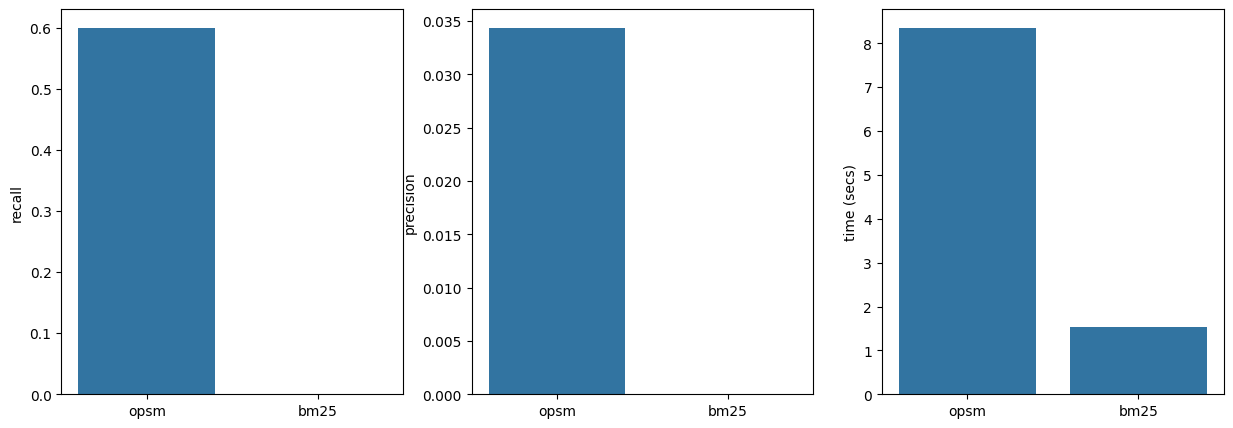

In [11]:
# with as many df as you want
plot = retriever_evaluator.compare(
    {"opsm": retrieved_data_opsm, "bm25": retrieved_data_bm25}
)

# pass arguments with matplotlib
plot.show()

In [8]:
print(f' Opsm: average precision: {retrieved_data_opsm["precision_retriever"].mean(axis=0)}')
print(f' Opsm: average recall: {retrieved_data_opsm["recall_retriever"].mean(axis=0)}')
print(f' BM2: average precision: {retrieved_data_bm25["precision_retriever"].mean(axis=0)}')
print(f' BM25: average recall: {retrieved_data_bm25["recall_retriever"].mean(axis=0)}')


 Opsm: average precision: 0.034383264352549125
 Opsm: average recall: 0.6
 BM2: average precision: 0.0
 BM25: average recall: 0.0


In [4]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
else:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

In [ ]:
!pip install lavague-contexts-gemini

In [12]:
from lavague.core.evaluator import LLMEvaluator
from lavague.contexts.openai import OpenaiContext
from lavague.contexts.gemini import GeminiContext
from lavague.core.navigation import NavigationEngine
import os
from lavague.drivers.selenium import SeleniumDriver

llm_evaluator = LLMEvaluator()
openai_engine = NavigationEngine.from_context(OpenaiContext(), SeleniumDriver())
gemini_engine = NavigationEngine.from_context(GeminiContext(), SeleniumDriver())
openai_results = llm_evaluator.evaluate(openai_engine, retrieved_data_opsm, "openai_results.csv")
gemini_results = llm_evaluator.evaluate(gemini_engine, retrieved_data_opsm, "gemini_results.csv")

5it [00:26,  5.26s/it]
5it [00:27,  5.45s/it]


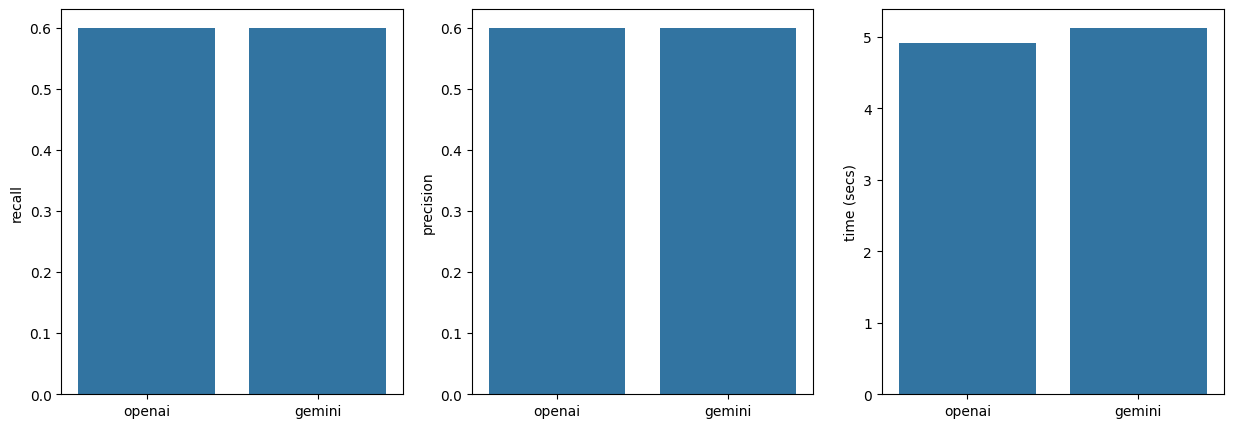

In [13]:
plot = llm_evaluator.compare(
    {
        "openai": openai_results,
        "gemini": gemini_results,
    }
)
plot.show()